In [73]:
import pandas as pd
import os
import glob
import numpy as np

In [74]:
folder_path = 'plot_data'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

In [105]:
dataframes = {}
all_dfs = []

for file in csv_files:
    filename = os.path.basename(file).split('.')[0]
    df = pd.read_csv(file)
    dataframes[filename] = df[['Step', 'Value']]
    df = df[['Step', 'Value']]
    
    filecode = filename.split('_')
    
    step_bin = 10000
    bins = np.arange(0, 1000000+step_bin, step_bin)
    step_labels = bins[1:].astype(int)
    
    df['Step Binned'] = pd.cut(df['Step'], bins=bins, labels=step_labels, right=True, include_lowest=True)
    
    if filecode[0] == 'PPO':
        df['Algorithm'] = 'PPO'
    else:
        if filecode[1] == '4groups':
            df['Algorithm'] = 'GRPO 4 groups'
        elif filecode[1] == '8groups':
            df['Algorithm'] = 'GRPO 8 groups'
        else:
            df['Algorithm'] = 'UNK'
        
    if filecode[-1] == 'length':
        df['Metric'] = 'Episode Length'
    elif filecode[-1] == 'rewards':
        df['Metric'] = 'Episode Reward'
    elif filecode[-1] == 'SPS':
        df['Metric'] = 'Steps Per Second'
    elif filecode[-1] == 'rate':
        df['Metric'] = 'Success Rate'
    else:
        df['Metric'] = 'UNK'
        
    all_dfs.append(df)
    
all_dfs = pd.concat(all_dfs, ignore_index=True)

In [106]:
success_rate_table = all_dfs[all_dfs['Metric'] == 'Success Rate']
success_rate_table = success_rate_table.filter(['Step', 'Step Binned', 'Value', 'Algorithm'])

eps_reward_table = all_dfs[all_dfs['Metric'] == 'Episode Reward']
eps_reward_table = eps_reward_table.filter(['Step', 'Step Binned', 'Value', 'Algorithm'])

eps_length_table = all_dfs[all_dfs['Metric'] == 'Episode Length']
eps_length_table = eps_length_table.filter(['Step', 'Step Binned', 'Value', 'Algorithm'])

sps_table = all_dfs[all_dfs['Metric'] == 'Steps Per Second']
sps_table = sps_table.filter(['Step', 'Step Binned', 'Value', 'Algorithm'])

In [118]:
last_100k_success_rate = success_rate_table[success_rate_table['Step Binned'] >= 800000]
last_100k_success_rate.pivot_table(index='Algorithm', values='Value', aggfunc=['mean', 'std'])

,mean,std
,Value,Value
Algorithm,,
GRPO 4 groups,0.996271,0.005624
GRPO 8 groups,0.998082,0.003817
PPO,0.965915,0.035048


In [121]:
last_100k_returns = eps_reward_table[eps_reward_table['Step Binned'] >= 600000]
last_100k_returns.pivot_table(index='Algorithm', values='Value', aggfunc=['mean', 'std'])

,mean,std
,Value,Value
Algorithm,,
GRPO 4 groups,-45.383830,22.699429
GRPO 8 groups,-41.646172,20.434891
PPO,-21.396586,3.061049


In [ ]:
last_100k_eps_length = eps_length_table[eps_length_table['Step Binned'] >= 800000]
last_100k_eps_length.pivot_table(index='Algorithm', values='Value', aggfunc=['mean', 'std'])

,mean,std
,Value,Value
Algorithm,,
GRPO 4 groups,17.072532,1.098958
GRPO 8 groups,15.112527,0.959699
PPO,49.601734,2.544858


In [125]:
last_100k_sps_table = sps_table[sps_table['Step Binned'] >= 100000]
last_100k_sps_table.pivot_table(index='Algorithm', values='Value', aggfunc=['mean', 'std'])

,mean,std
,Value,Value
Algorithm,,
GRPO 4 groups,102.615730,2.201192
GRPO 8 groups,63.065169,0.798521
PPO,131.939326,6.342933


### Plot SPS

Text(0.5, 1.0, 'Computational Efficiency Comparison')

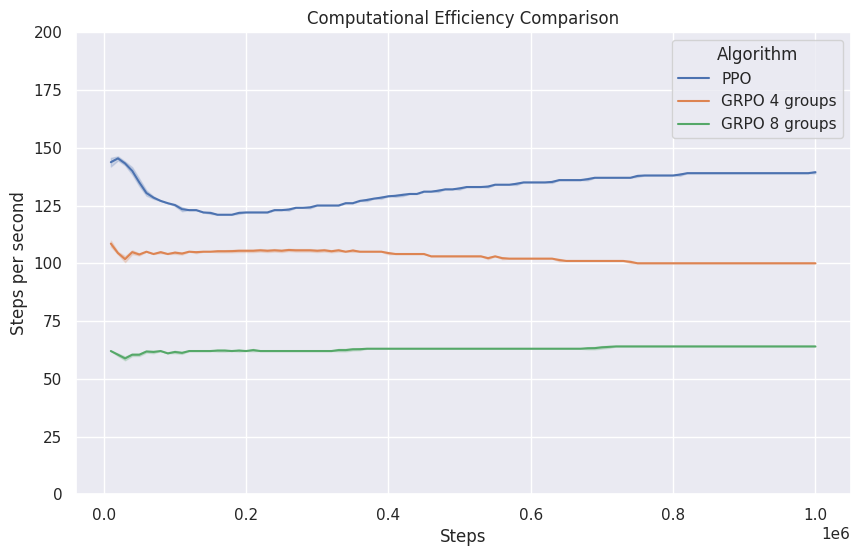

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

algorithm_order = ['PPO', 'GRPO 4 groups', 'GRPO 8 groups']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Step Binned', y='Value', data=sps_table, hue='Algorithm', hue_order=algorithm_order, errorbar='sd', estimator='mean')
plt.ylim(0,200)
plt.xlabel('Steps')
plt.ylabel('Steps per second')
plt.title('Computational Efficiency Comparison')

### Plot Episodic length

Text(0.5, 1.0, 'Episode Length Comparison')

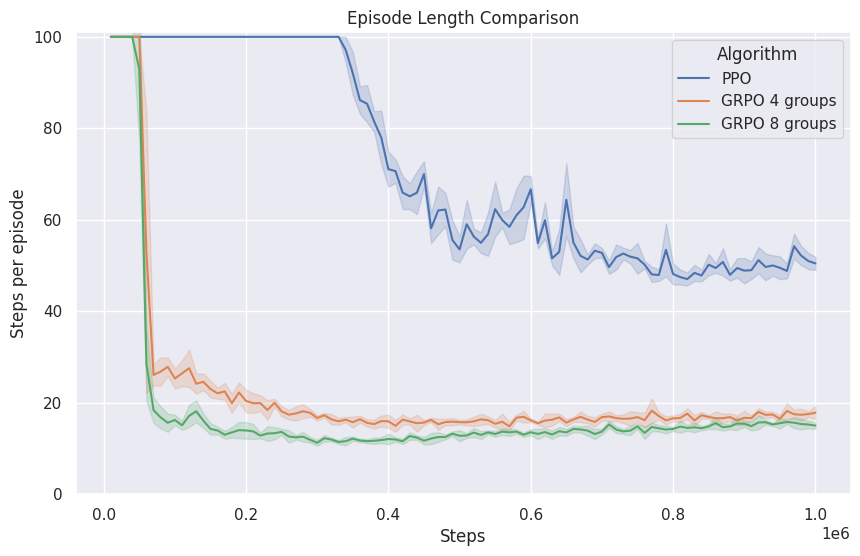

In [109]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Step Binned', y='Value', data=eps_length_table, hue='Algorithm', hue_order=algorithm_order, errorbar='sd', estimator='mean')
plt.ylim(0,101)
plt.xlabel('Steps')
plt.ylabel('Steps per episode')
plt.title('Episode Length Comparison')

### Success rate

Text(0.5, 1.0, 'Success Rate Comparison')

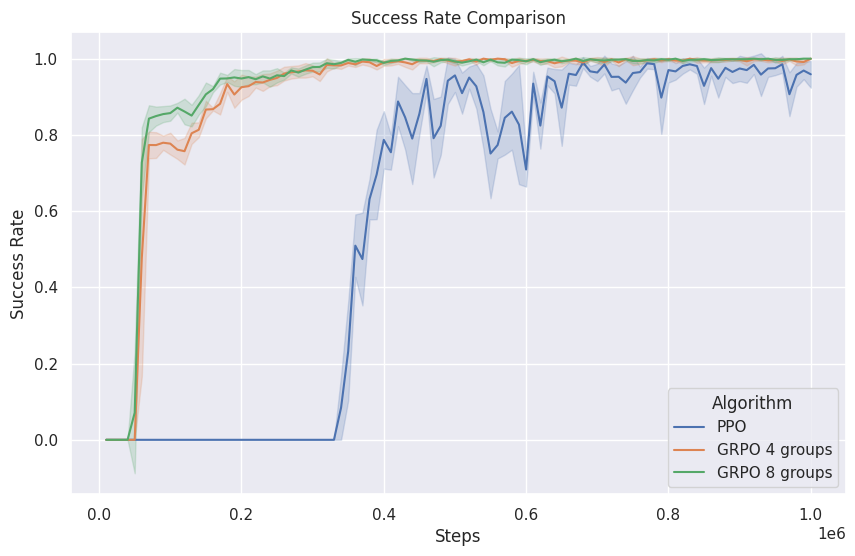

In [110]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Step Binned', y='Value', data=success_rate_table, hue='Algorithm', hue_order=algorithm_order, errorbar='sd', estimator='mean')
# plt.ylim(0,101)
plt.xlabel('Steps')
plt.ylabel('Success Rate')
plt.title('Success Rate Comparison')

### Episodic Return

Text(0.5, 1.0, 'Episodic Return Comparison')

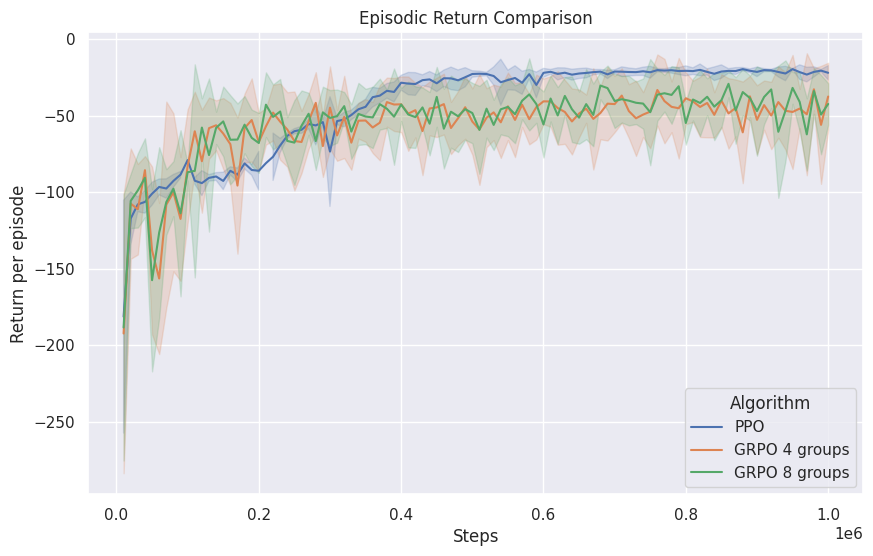

In [111]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Step Binned', y='Value', data=eps_reward_table, hue='Algorithm', hue_order=algorithm_order, errorbar='sd', estimator='mean')
# plt.ylim(0,101)
plt.xlabel('Steps')
plt.ylabel('Return per episode')
plt.title('Episodic Return Comparison')